In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
data = pd.read_csv("Mall_Customers.csv");

In [3]:
data.head

<bound method NDFrame.head of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [4]:
# % of male ad female is almost the same so it dont really influence data
data['Gender'].value_counts(normalize=True) * 100

Female    56.0
Male      44.0
Name: Gender, dtype: float64

In [5]:
# CustomerID is not needed 
data = data.drop(['CustomerID', 'Gender'], axis=1)

In [6]:
data_np = data.to_numpy()
age = data_np[:, 0]
annual_in = data_np[:, 1]
score = data_np[:, 2]

<IPython.core.display.Javascript object>


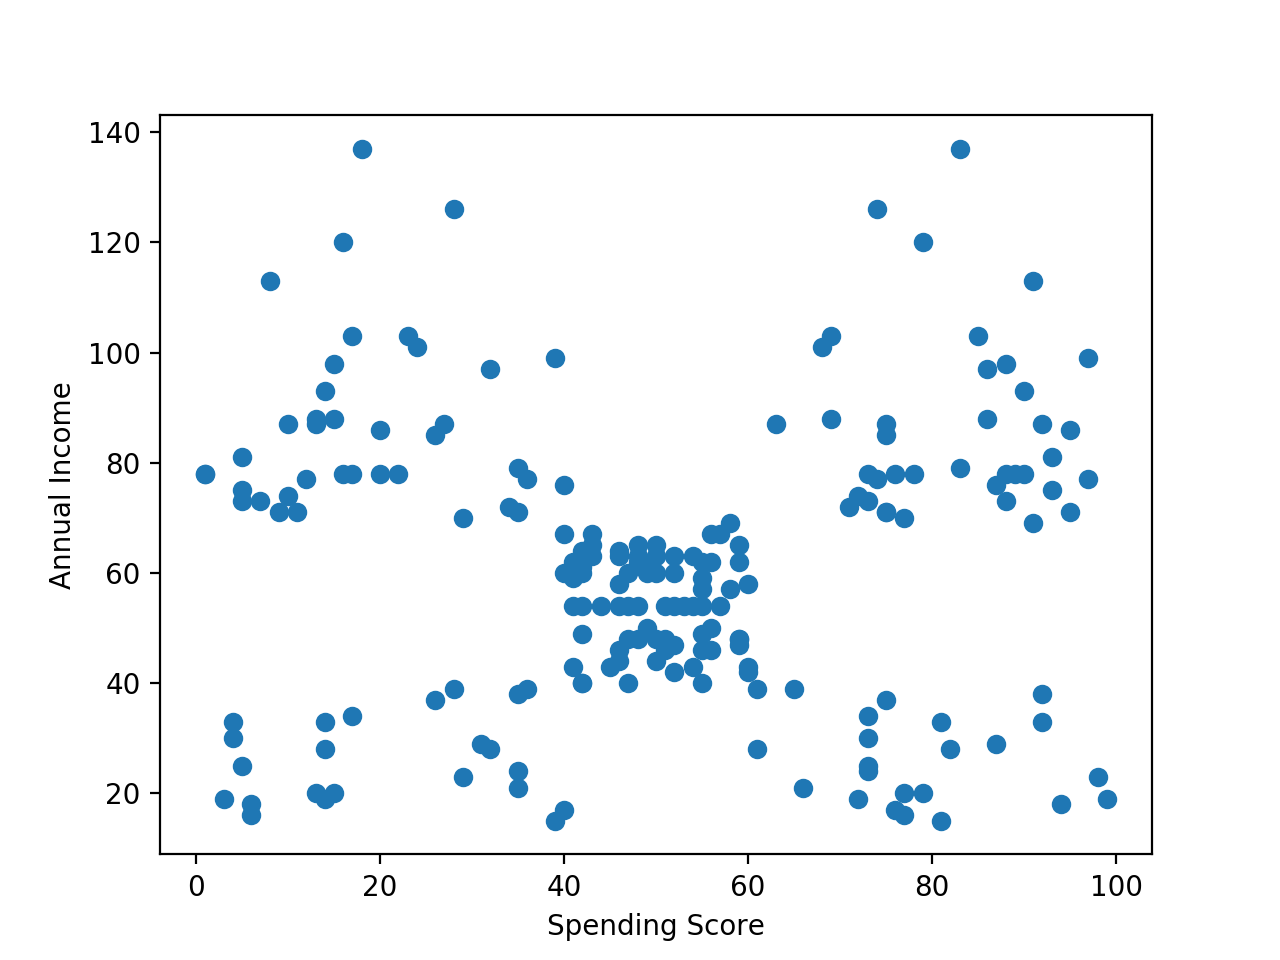

In [7]:
#as we can see there clearly is some kind of correlation between these two groups 
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.scatter(score, annual_in)

<IPython.core.display.Javascript object>


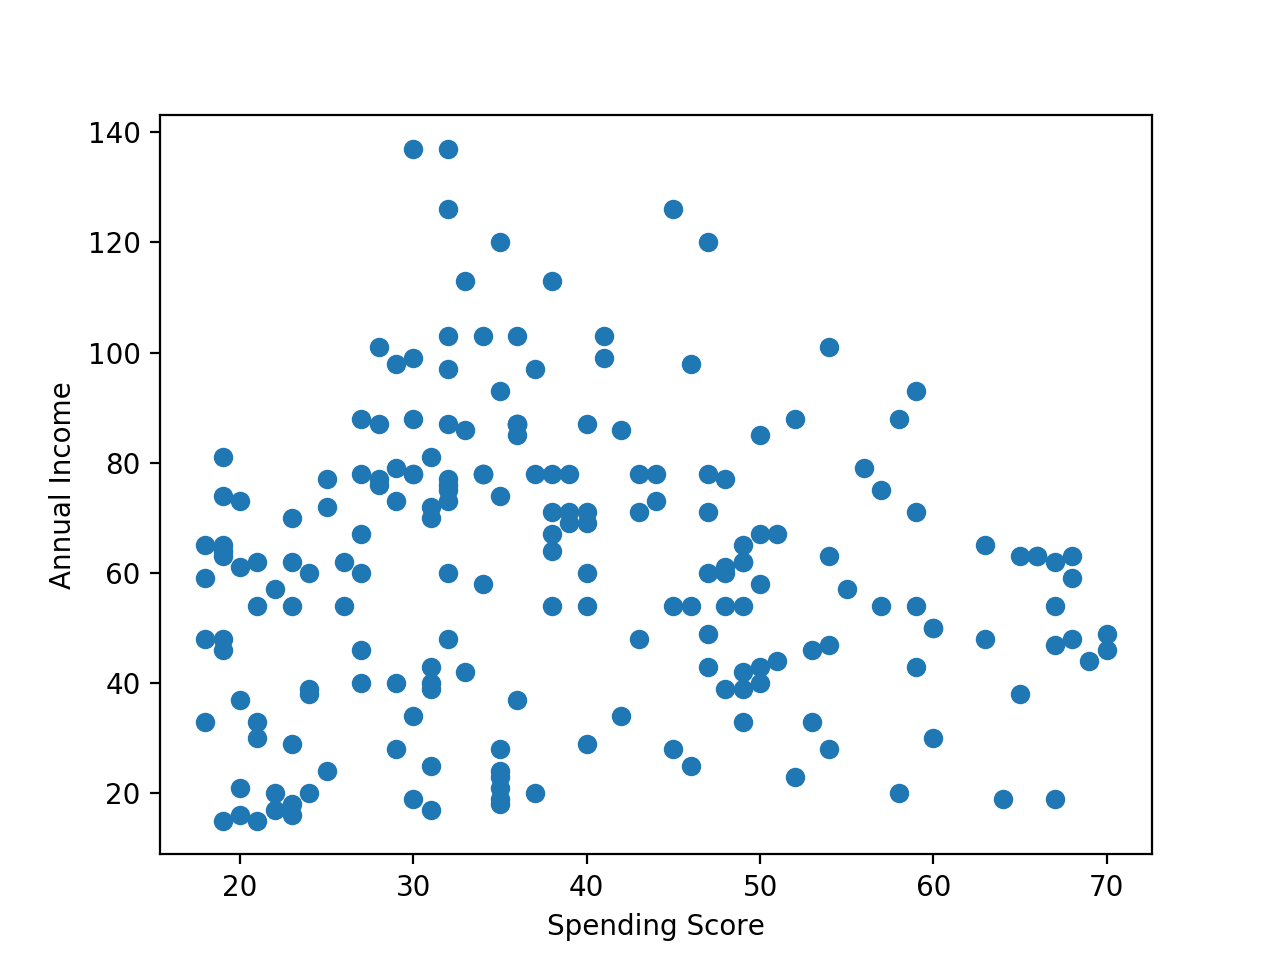

In [8]:
#no correlation
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.scatter(age, annual_in)

<IPython.core.display.Javascript object>


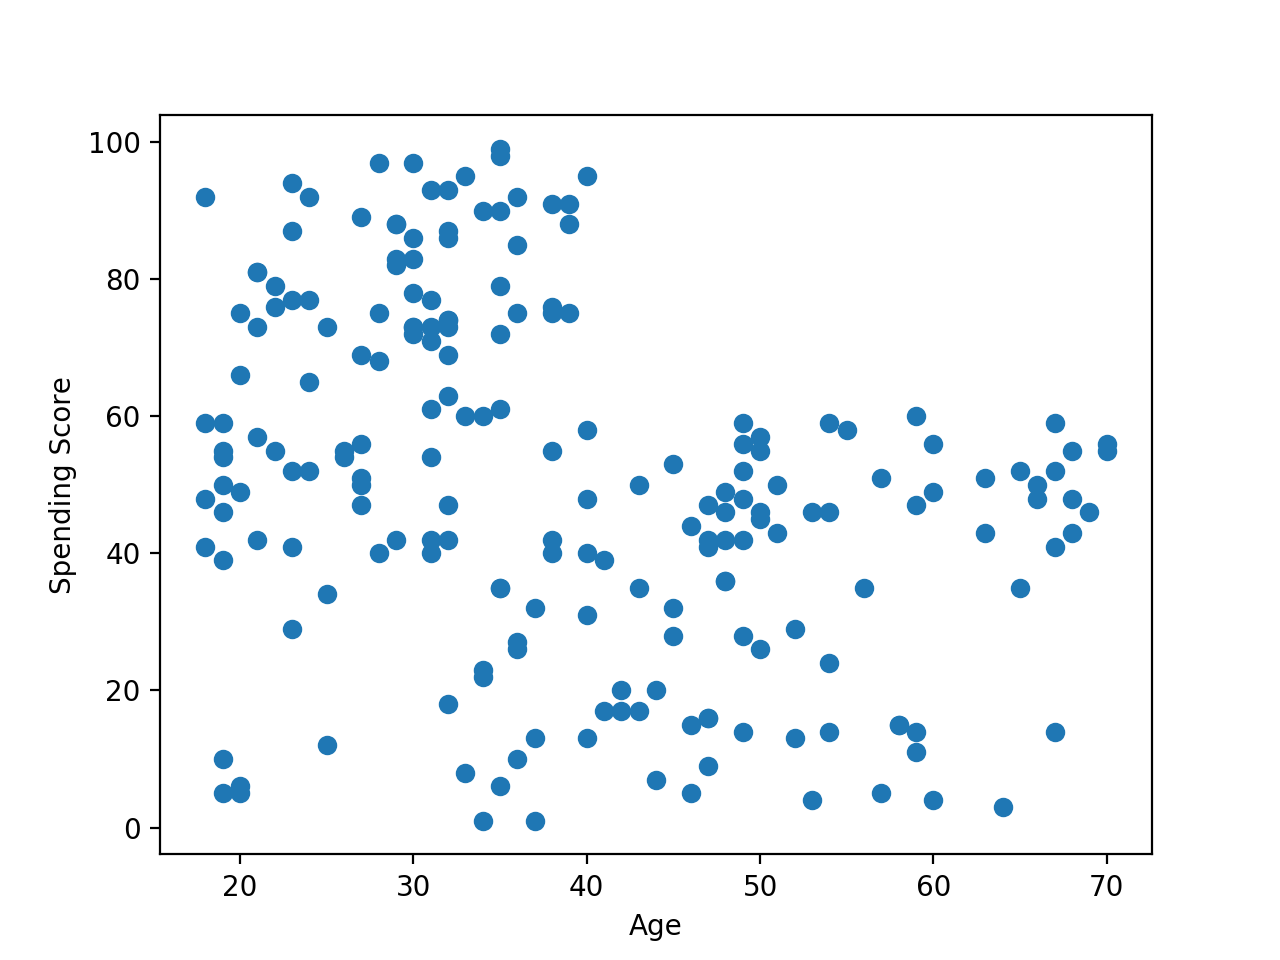

In [9]:
#no correlation
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter(age, score)

In [10]:
def find_closest_centroid(data, K, centroids):
    """finding the closest centroid to the data points"""
    centroid_data = np.zeros(len(data))
    for i in range(len(data)):
        temp = np.zeros(K)
        for j in range(K):
            temp[j] = (np.linalg.norm(data[i, :] - centroids[j, :]))**2 #finding the distance between centroids
        centroid_data[i] = np.argmin(temp)#finding the closest centroid to the data point
    return centroid_data

In [11]:
def new_centroids(data, K):
    """creating new centroids, they are placed in different data points"""
    rnd = random.sample(range(0, len(data)), len(data))
    centroids = np.zeros((K, 2))
    for i in range(K):
        centroids[i] = data[rnd[i], :]
    return centroids

In [12]:
def combine_data(data1, data2):
    return np.vstack((data1, data2)).T

In [13]:
def show_data_map(data, K, centroids, points):
    """shows to which centroid the data point is assigned to"""
    colors_o = ['bo', 'go', 'ro', 'co', 'mo', 'yo', 'ko']
    for i in range(K):
        for j in range(len(data)):
            if points[j] == i:
                plt.plot(data[j, 0], data[j, 1], colors_o[i], markersize=7, zorder=0)

In [14]:
def move_centroids(data, K, points):
    """moves the centroid towards their assigned data points"""
    new_centroids = np.zeros((K, np.size(data, 1)))
    for i in range(K):
        count = 0
        for j in range(len(data)):
            if points[j] == i:
                count += 1
                new_centroids[i] += data[j]
        new_centroids[i] = new_centroids[i] / count
    return new_centroids

In [15]:
error = np.zeros(8)
K = 1
score_annual = combine_data(score, annual_in)
# testing how many clusters do we need using the elbow method
for j in range(8):#there will be 8 difrent clusters  
    K += 1
    temp2 = np.zeros(10)
    # creating 10 same K clusters but with different centroid placement, this ensures
    #that we get #the best centroid placment for specific K
    for a in range(10):
        centroids = new_centroids(score_annual, K)

        for i in range(10):#training
            points = find_closest_centroid(score_annual, K, centroids)
            centroids = move_centroids(score_annual, K, points)
        
        #calculating how far away are each data point from each centroid
        temp = 0
        for i in range(K):
            for k in range(len(score_annual)):
                if points[k] == i:
                    temp += (np.linalg.norm(score_annual[k, :] - centroids[i, :]))**2
                    
        temp2[a] = temp
    error[j] = np.amin(temp2) / len(score_annual)#picking the smallest centroid from each K

<IPython.core.display.Javascript object>


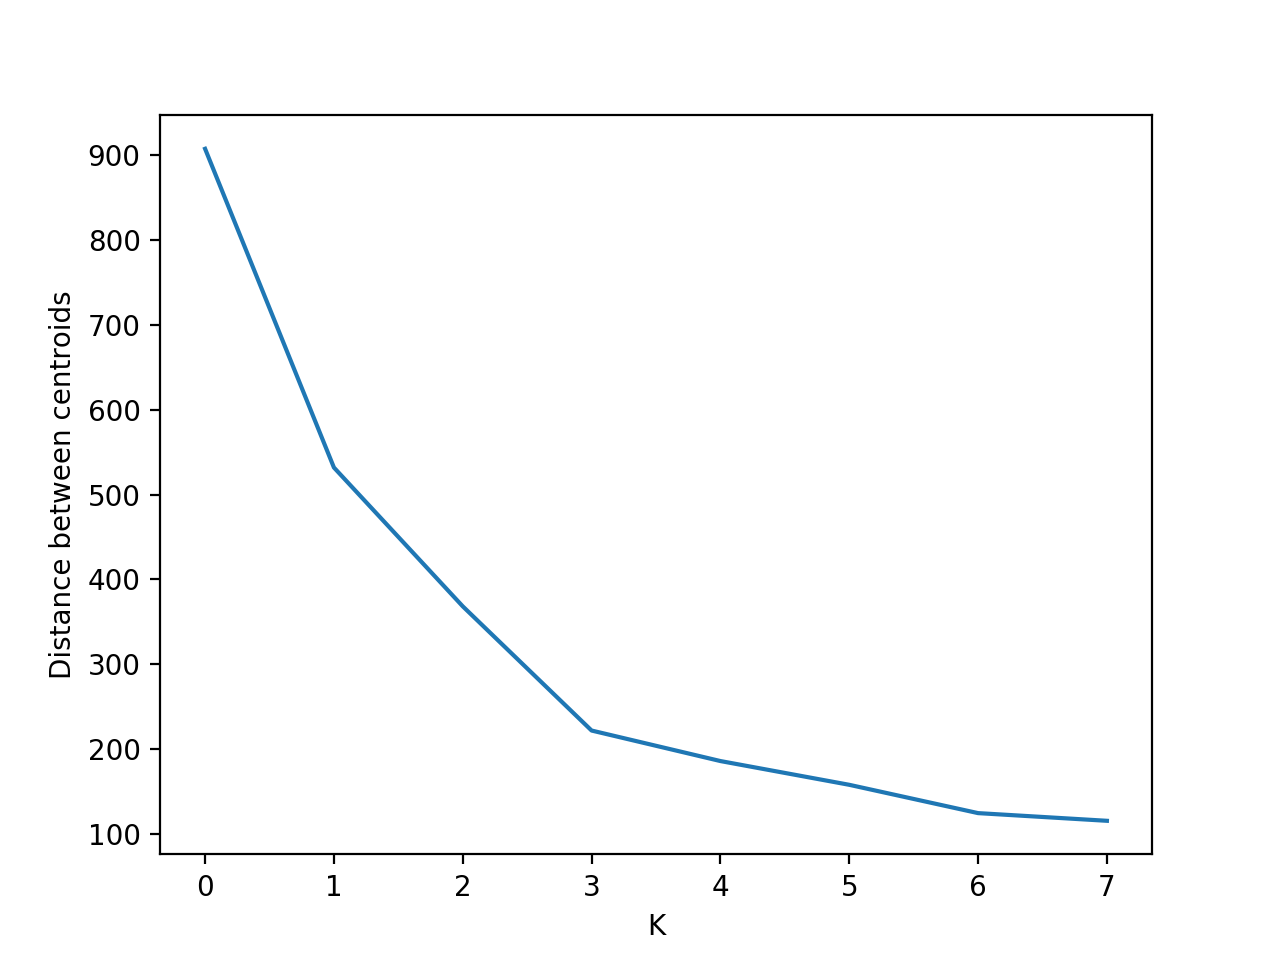

In [16]:
#as we can see K = 5 is the best for this data set
#(K = 5 and not 3, because K starts from 2, so add 2 to every showns K)
plt.xlabel('K')
plt.ylabel('Distance between centroids')
plt.plot(error)

<IPython.core.display.Javascript object>


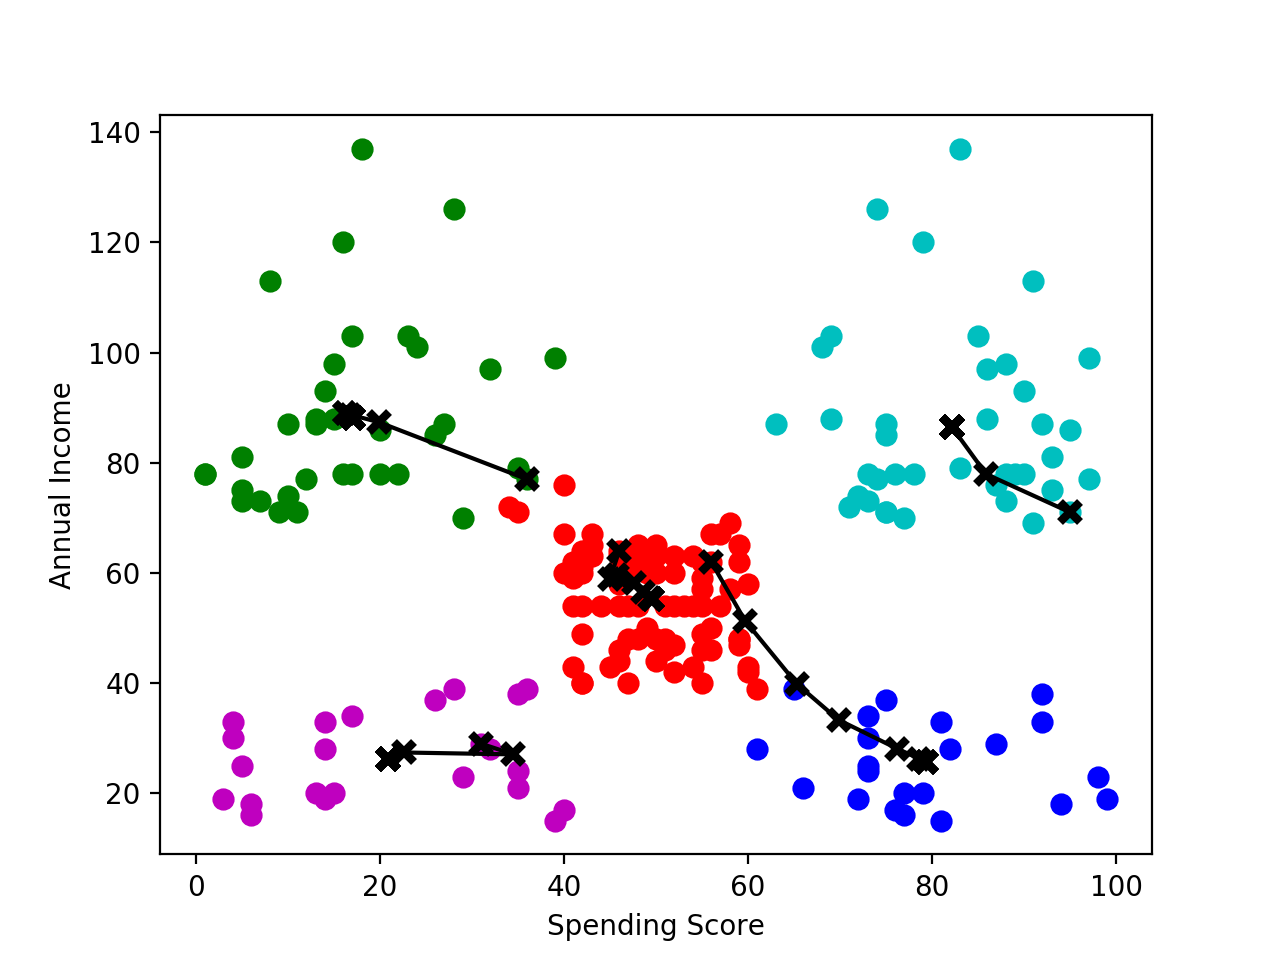

In [17]:
#different colors represent different control groups and the black
#lines shows how the centroid moved around the map
#this shows that there are 5 different spending groups depending on their annual income and spending score
K = 5
centroids = new_centroids(score_annual, K)

for i in range(10):
    points = find_closest_centroid(score_annual, K, centroids)
    new_centroids = move_centroids(score_annual, K, points)
    
    for j in range(K):#drawing movement of centroids
        x_values = [centroids[j,0], new_centroids[j, 0]]
        y_values = [centroids[j,1], new_centroids[j, 1]]
        plt.plot(x_values, y_values, 'k-', zorder=2)
        plt.plot(centroids[j, 0], centroids[j, 1], 'kx', markeredgewidth = 3, markersize = 7,  zorder=3)
    
    centroids = new_centroids

show_data_map(score_annual, K, centroids, points)
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.show()